In [223]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Keras
import keras

# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import tensorflow as tf
from sklearn.utils import shuffle


plt.style.use('ggplot')
import librosa
from librosa import feature
from librosa import display
genres = [
    'blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop',
    'reggae', 'rock'
]

In [265]:
# load dataframe from csv
dfFeatures = pd.read_csv("music_features_updated.csv")

# shuffle dataframe
dfFeatures = shuffle(dfFeatures)

# extract genres for labels
genreList = dfFeatures['genre']

# drop genres and filenames for training data
dfFeatures= dfFeatures.drop(columns = ['filename', 'genre'])

dfFeatures.head()

,chroma_stft_mean,chroma_stft_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
182,0.341627,0.088890,1542.054140,51679.486716,1667.307914,13447.672432,3050.670339,1.433966e+05,0.083324,0.000785,...,12.408511,38.523075,5.372583,44.704056,3.505466,55.359486,-1.215526,77.329575,-2.595721,105.251923
280,0.247579,0.092651,1429.140809,331200.742382,1843.250145,130979.622030,2984.072288,1.597728e+06,0.045664,0.000552,...,-3.745016,52.863861,-15.395099,75.512619,-1.966377,69.642128,-10.062986,52.145866,-9.757386,50.297405
47,0.272234,0.085805,2196.716431,226990.283444,2089.324800,33956.618391,4604.733099,4.332720e+05,0.116998,0.002698,...,-2.400663,53.551147,-10.774766,57.048561,-3.288728,160.795242,-1.544444,98.781456,-2.685685,65.512749
485,0.472131,0.080519,1805.989354,411676.060513,2206.637409,170559.307445,3780.051388,2.003482e+06,0.066901,0.001692,...,3.278295,65.529373,-1.790902,36.794479,-2.687505,49.097275,-4.312038,66.889450,-1.769746,54.125484
582,0.279931,0.090081,1694.254607,87286.067345,2099.628824,74976.077478,3471.666942,5.100469e+05,0.064743,0.000541,...,-2.977459,38.680042,-1.414850,45.602169,-1.524254,35.388638,-4.736964,33.726143,-7.608630,42.415928


In [266]:
# standardize data  
scaler = StandardScaler()
X = scaler.fit_transform(np.array(dfFeatures.iloc[:, :-1], dtype = float))

# encode labels 
encoder = LabelEncoder()
y = encoder.fit_transform(genreList)

# split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)


In [267]:
# initialize keras network
model = keras.Sequential()
model.add(keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [268]:
# configure model for training
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [269]:
# train model
history = model.fit(X_train,
                    y_train,
                    epochs=100,
                    batch_size=128)

Epoch 1/100
6/6 [==============================] - 0s 3ms/step - loss: 2.3222 - accuracy: 0.1490
Epoch 2/100
6/6 [==============================] - 0s 3ms/step - loss: 1.9514 - accuracy: 0.4017
Epoch 3/100
6/6 [==============================] - 0s 7ms/step - loss: 1.6663 - accuracy: 0.4720
Epoch 4/100
6/6 [==============================] - 0s 7ms/step - loss: 1.4552 - accuracy: 0.5225
Epoch 5/100
6/6 [==============================] - 0s 4ms/step - loss: 1.2500 - accuracy: 0.5777
Epoch 6/100
6/6 [==============================] - 0s 5ms/step - loss: 1.0885 - accuracy: 0.6190
Epoch 7/100
6/6 [==============================] - 0s 7ms/step - loss: 0.9824 - accuracy: 0.6363
Epoch 8/100
6/6 [==============================] - 0s 7ms/step - loss: 0.9119 - accuracy: 0.6820
Epoch 9/100
6/6 [==============================] - 0s 3ms/step - loss: 0.8397 - accuracy: 0.7178
Epoch 10/100
6/6 [==============================] - 0s 6ms/step - loss: 0.7558 - accuracy: 0.7526
Epoch 11/100
6/6 [===========

6/6 [==============================] - 0s 7ms/step - loss: 0.0102 - accuracy: 0.9987
Epoch 85/100
6/6 [==============================] - 0s 4ms/step - loss: 0.0086 - accuracy: 0.9981
Epoch 86/100
6/6 [==============================] - 0s 4ms/step - loss: 0.0067 - accuracy: 0.9994
Epoch 87/100
6/6 [==============================] - 0s 5ms/step - loss: 0.0090 - accuracy: 0.9987
Epoch 88/100
6/6 [==============================] - 0s 4ms/step - loss: 0.0075 - accuracy: 0.9994
Epoch 89/100
6/6 [==============================] - 0s 3ms/step - loss: 0.0074 - accuracy: 0.9991
Epoch 90/100
6/6 [==============================] - 0s 3ms/step - loss: 0.0096 - accuracy: 0.9981
Epoch 91/100
6/6 [==============================] - 0s 3ms/step - loss: 0.0071 - accuracy: 0.9994
Epoch 92/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0100 - accuracy: 0.9952
Epoch 93/100
6/6 [==============================] - 0s 3ms/step - loss: 0.0089 - accuracy: 0.9987
Epoch 94/100
6/6 [===============

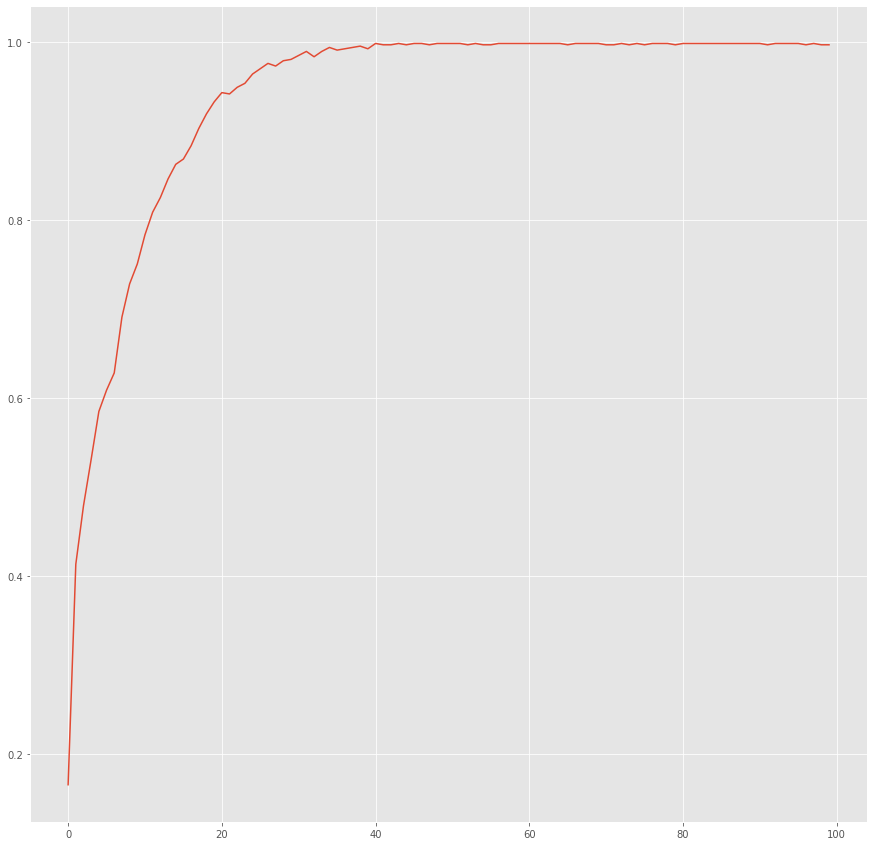

In [270]:
fig, ax = plt.subplots(1,1,figsize=(15,15))

ax.plot(history.history['accuracy'])
#plt.plot(history.history['val_acc'])

In [272]:
test_loss, test_acc  = model.evaluate(X_test, y_test, batch_size=128)

3/3 [==============================] - 0s 6ms/step - loss: 1.4624 - accuracy: 0.7091
